# Precio Autos

🎯 El desafio es aplicar lo que vimos en clase en el dataset "cars.csv" y aplicar tecnicas de seleccion de varaibles.
🎯 Despues crear un modelo que permita predecir si un Auto es caro o barato.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

Cuales serian los pasos a seguir?

In [ ]:
#Carguemos el dataset
df = pd.read_csv('ML_Cars_dataset.csv')
df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,64.1,2548,dohc,four,2.68,5000,expensive
1,std,front,64.1,2548,dohc,four,2.68,5000,expensive
2,std,front,65.5,2823,ohcv,six,3.47,5000,expensive
3,std,front,NaN,2337,ohc,four,3.40,5500,expensive
4,std,front,66.4,2824,ohc,five,3.40,5500,expensive


ℹ️ Las columnas serian:
-> aspiration : Aspiracion que usa el motor
	std	Estandar
	turbo	Turbo
-> enginelocation : Localizacion del motor
	front	Frente
	rear	Atras
-> carwidth : Ancho del auto
-> curbweight : Peso del auto
-> enginetype : Tipo de motor del auto
-> cylindernumber : Cantidad de cilindros del auto
-> stroke : Se refiere a la distancia que se mueve un pistón desde el punto muerto inferior al punto muerto superior a medida que gira el cigüeñal.
-> peakrpm : RPM maxima del auto
-> price : Precio si es considerado costoso(expensive) o barato(cheap)

## (1) Eliminar duplicados

In [ ]:
print(f"Tenemos {df.duplicated().sum()} filas duplicadas, que hacemos??")



Tenemos 14 filas duplicadas, que hacemos??


In [ ]:
df= df.drop_duplicates().reset_index(drop = True)
print(f"Ahora tenemos {df.duplicated().sum()} filas duplicadas en el dataset.")

Ahora tenemos 0 filas duplicadas en el dataset.


## (2) Valores Faltantes

Busqueda de valores faltantes, si tenemos algunos debemos imputarlos.


In [ ]:
df.isnull().sum().sort_values(ascending=False)

enginelocation    10
carwidth           2
aspiration         0
curbweight         0
enginetype         0
cylindernumber     0
stroke             0
peakrpm            0
price              0
dtype: int64

In [ ]:
# Ahora en porcentual
round(df.isnull().sum().sort_values(ascending=False)/len(df),3)

enginelocation    0.052
carwidth          0.010
aspiration        0.000
curbweight        0.000
enginetype        0.000
cylindernumber    0.000
stroke            0.000
peakrpm           0.000
price             0.000
dtype: float64

Vemos que tenemos dos variables a imputar unas recomendaciones:
-> `strategy = "most frequent"` Variables categoricas
-> `strategy = "median"` Variables numericas

`carwidth` primera variable a imputar

Hacemos un analisis de los valores que tenemos

In [ ]:
df.carwidth.value_counts(dropna=False) # Check unique values in column

66.5    22
63.8    19
65.4    15
63.6     9
68.4     9
64       9
64.4     9
65.5     8
65.2     7
65.6     6
64.2     6
66.3     6
67.2     6
66.9     5
67.9     5
*        4
68.9     4
71.7     3
70.3     3
65.7     3
63.9     3
64.8     3
65       2
67.7     2
68.3     2
71.4     2
NaN      2
66.6     1
63.4     1
72.3     1
64.1     1
68       1
72       1
70.5     1
66.1     1
70.6     1
69.6     1
61.8     1
66       1
64.6     1
60.3     1
70.9     1
66.4     1
68.8     1
Name: carwidth, dtype: int64

Vemos que tenemos diferentes formas de mostrar los NaN, algunos Nan y otros "*".

In [ ]:
df = df.replace("*", np.nan)

In [ ]:
from sklearn.impute import SimpleImputer

carwidth_imp = SimpleImputer(strategy="median")
carwidth_imp.fit(df[['carwidth']])
df['carwidth'] = carwidth_imp.transform(df[['carwidth']])

df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,64.1,2548,dohc,four,2.68,5000,expensive
1,std,front,65.5,2823,ohcv,six,3.47,5000,expensive
2,std,front,65.5,2337,ohc,four,3.40,5500,expensive
3,std,front,66.4,2824,ohc,five,3.40,5500,expensive
4,std,front,66.3,2507,ohc,five,3.40,5500,expensive


In [ ]:
# Vamos a chequearlo
df.carwidth.value_counts()

66.5    22
63.8    19
65.4    15
65.5    14
63.6     9
68.4     9
64.4     9
64.0     9
65.2     7
67.2     6
64.2     6
65.6     6
66.3     6
66.9     5
67.9     5
68.9     4
71.7     3
70.3     3
65.7     3
63.9     3
64.8     3
65.0     2
67.7     2
71.4     2
68.3     2
66.6     1
63.4     1
72.3     1
64.1     1
68.0     1
72.0     1
70.5     1
66.1     1
70.6     1
69.6     1
61.8     1
66.0     1
64.6     1
60.3     1
70.9     1
66.4     1
68.8     1
Name: carwidth, dtype: int64

`enginelocation`  que tipo tenemos?

In [ ]:
df.enginelocation.dtype

dtype('O')

In [ ]:
print(df.enginelocation.unique()) # Unique values

['front' nan 'rear']


In [ ]:
print(df.enginelocation.value_counts(dropna=False)) # Count of each value

front    179
NaN       10
rear       2
Name: enginelocation, dtype: int64


In [ ]:
engine_imp = SimpleImputer(strategy="most_frequent")
engine_imp.fit(df[['enginelocation']])
df['enginelocation'] = engine_imp.transform(df[['enginelocation']])

df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,64.1,2548,dohc,four,2.68,5000,expensive
1,std,front,65.5,2823,ohcv,six,3.47,5000,expensive
2,std,front,65.5,2337,ohc,four,3.40,5500,expensive
3,std,front,66.4,2824,ohc,five,3.40,5500,expensive
4,std,front,66.3,2507,ohc,five,3.40,5500,expensive


In [ ]:
# Vamos a chequearlo
df.enginelocation.value_counts()

front    189
rear       2
Name: enginelocation, dtype: int64

## (3) Escalar las variables numericas

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   aspiration      191 non-null    object 
 1   enginelocation  191 non-null    object 
 2   carwidth        191 non-null    float64
 3   curbweight      191 non-null    int64  
 4   enginetype      191 non-null    object 
 5   cylindernumber  191 non-null    object 
 6   stroke          191 non-null    float64
 7   peakrpm         191 non-null    int64  
 8   price           191 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 13.6+ KB


In [ ]:
# And here are the numerical features of the dataset we need to scale
numericas = df.select_dtypes(exclude=['object']).columns
numericas

Index(['carwidth', 'curbweight', 'stroke', 'peakrpm'], dtype='object')

Investigar las variables numericas buscando outliers y analizando su distribucion con al fin de determinar como vamos a escalar las mismas.

Tenemos dos metodos:
 - Escalado Robusto
  - Escalado Estandar



### `peakrpm` , `carwidth` , & `stroke`

<AxesSubplot:title={'center':'Boxplot depeakrpm'}, xlabel='peakrpm'>

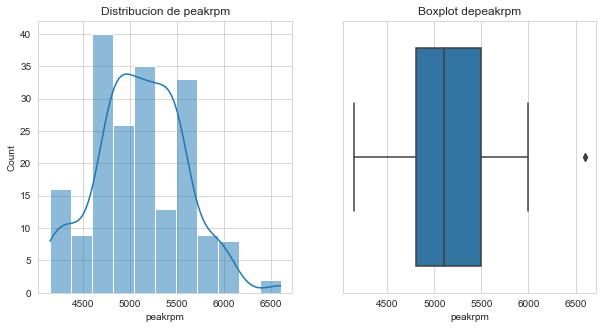

In [ ]:
variable = 'peakrpm'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = df, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = df, x = f"{variable}", ax=ax[1])



<AxesSubplot:title={'center':'Boxplot decarwidth'}, xlabel='carwidth'>

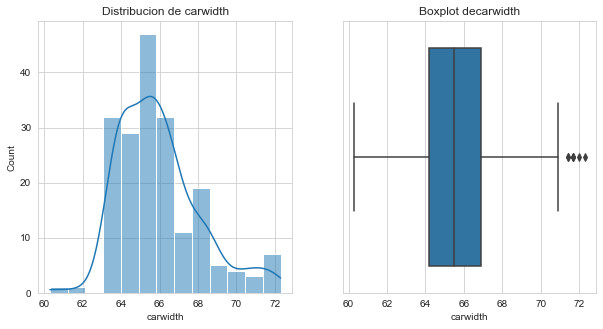

In [ ]:
variable = 'carwidth'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = df, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = df, x = f"{variable}", ax=ax[1])


<AxesSubplot:title={'center':'Boxplot de stroke'}, xlabel='stroke'>

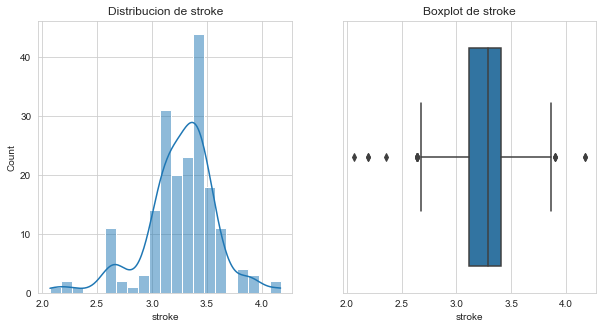

In [ ]:
variable = 'stroke'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = df, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de {variable}")
sns.boxplot(data = df, x = f"{variable}", ax=ax[1])

Despues de analizar estas 3 variables se puede ver que tienen un distribucion normal y tienen outliers, por lo que vamos a hacer un escalado robusto.

In [ ]:
from sklearn.preprocessing import RobustScaler

rb_scaler = RobustScaler() 
df['peakrpm'],df['carwidth'],df['stroke'] = rb_scaler.fit_transform(df[['peakrpm','carwidth','stroke']]).T
df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,-0.518519,2548,dohc,four,-2.033333,-0.142857,expensive
1,std,front,0.000000,2823,ohcv,six,0.600000,-0.142857,expensive
2,std,front,0.000000,2337,ohc,four,0.366667,0.571429,expensive
3,std,front,0.333333,2824,ohc,five,0.366667,0.571429,expensive
4,std,front,0.296296,2507,ohc,five,0.366667,0.571429,expensive


### `curbweight`

<AxesSubplot:title={'center':'Boxplot de curbweight'}, xlabel='curbweight'>

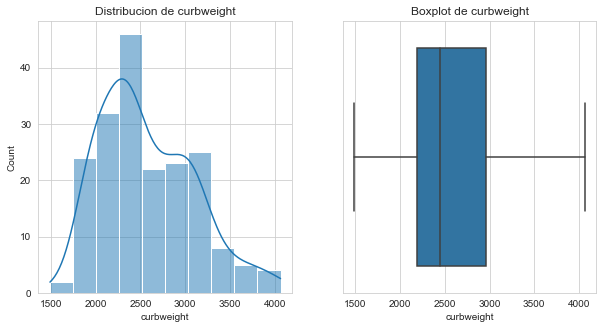

In [ ]:
variable = 'curbweight'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = df, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de {variable}")
sns.boxplot(data = df, x = f"{variable}", ax=ax[1])

In [ ]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
df['curbweight'] = std_scaler.fit_transform(df[['curbweight']])
df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,-0.518519,-0.048068,dohc,four,-2.033333,-0.142857,expensive
1,std,front,0.000000,0.476395,ohcv,six,0.600000,-0.142857,expensive
2,std,front,0.000000,-0.450474,ohc,four,0.366667,0.571429,expensive
3,std,front,0.333333,0.478302,ohc,five,0.366667,0.571429,expensive
4,std,front,0.296296,-0.126260,ohc,five,0.366667,0.571429,expensive


## (4) Encoding de variables categoricas

Investigar las variables que requieren encoding y aplicar alguna de las tecnicas que vimos.


### `aspiration` & `enginelocation`

In [ ]:
print(f"Los valores unicos de Aspiration son {df.aspiration.unique()}")

Los valores unicos de Aspiration son ['std' 'turbo']


In [ ]:
print(f"Los valores unicos de enginelocation son {df.enginelocation.unique()}")

Los valores unicos de enginelocation son ['front' 'rear']


Como vemos estos dos son binarios

In [ ]:
from sklearn.preprocessing import OneHotEncoder

binary_encoder = OneHotEncoder(sparse=False, drop='if_binary')
df['aspiration'], df['enginelocation'] = binary_encoder.fit_transform(df[['aspiration', 'enginelocation']]).T

df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,0.0,0.0,-0.518519,-0.048068,dohc,four,-2.033333,-0.142857,expensive
1,0.0,0.0,0.000000,0.476395,ohcv,six,0.600000,-0.142857,expensive
2,0.0,0.0,0.000000,-0.450474,ohc,four,0.366667,0.571429,expensive
3,0.0,0.0,0.333333,0.478302,ohc,five,0.366667,0.571429,expensive
4,0.0,0.0,0.296296,-0.126260,ohc,five,0.366667,0.571429,expensive


### `enginetype`

In [ ]:
df.enginetype.unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

Es multicategorica asi que vamos a usar One Hot Encoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
ohe.fit(df[['enginetype']])
display(ohe.categories_)
display(ohe.get_feature_names_out())
enginetype_encoded = ohe.transform(df[['enginetype']])

df[ohe.get_feature_names_out()] = enginetype_encoded


df.drop(columns='enginetype', inplace = True)

df

[array(['dohc', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor'], dtype=object)]

array(['enginetype_dohc', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor'], dtype=object)

,aspiration,enginelocation,carwidth,curbweight,cylindernumber,stroke,peakrpm,price,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,0.0,0.0,-0.518519,-0.048068,four,-2.033333,-0.142857,expensive,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.476395,six,0.600000,-0.142857,expensive,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.000000,-0.450474,four,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.333333,0.478302,five,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.296296,-0.126260,five,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,0.0,0.0,1.259259,0.722416,four,-0.466667,0.428571,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
187,1.0,0.0,1.222222,0.907408,four,-0.466667,0.285714,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
188,0.0,0.0,1.259259,0.836844,six,-1.400000,0.571429,expensive,0.0,0.0,0.0,0.0,0.0,1.0,0.0
189,1.0,0.0,1.259259,1.227807,six,0.366667,-0.428571,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### `cylindernumber`

In [ ]:
df.cylindernumber.unique() # Check unique values

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

Esta variable es tipo ordinal por lo que se va a convertir de forma manual

In [ ]:
df['cylindernumber'] = df['cylindernumber'].map({'two':2,
                                                 'three': 3,
                                                 'four': 4,
                                                 'five':5,
                                                 'six': 6,
                                                 'eight':8,
                                                 'twelve':12})
df.head()

,aspiration,enginelocation,carwidth,curbweight,cylindernumber,stroke,peakrpm,price,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,0.0,0.0,-0.518519,-0.048068,4,-2.033333,-0.142857,expensive,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.476395,6,0.600000,-0.142857,expensive,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.000000,-0.450474,4,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.333333,0.478302,5,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.296296,-0.126260,5,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Y ahora quedo tipo numerica.

Sera que tenemos que escalarla?
De acuerdo a la distribucion cual tipo de escalamiento usariamos?

In [ ]:
df['cylindernumber'].value_counts()

4     147
6      23
5      11
8       5
2       3
3       1
12      1
Name: cylindernumber, dtype: int64

(array([5., 1., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([  1. ,  15.6,  30.2,  44.8,  59.4,  74. ,  88.6, 103.2, 117.8,
        132.4, 147. ]),
 <BarContainer object of 10 artists>)

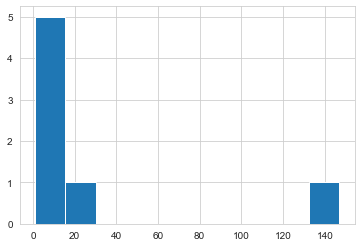

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['cylindernumber'].value_counts())

No es tipo normal, probemos usando escalado Robusto

In [ ]:
from sklearn.preprocessing import RobustScaler

rb_scaler = RobustScaler()

df['cylindernumber'] = rb_scaler.fit_transform(df[['cylindernumber']])

df.head()

,aspiration,enginelocation,carwidth,curbweight,cylindernumber,stroke,peakrpm,price,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,0.0,0.0,-0.518519,-0.048068,0.0,-2.033333,-0.142857,expensive,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.476395,2.0,0.600000,-0.142857,expensive,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.000000,-0.450474,0.0,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.333333,0.478302,1.0,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.296296,-0.126260,1.0,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### `price`

Esta variable es el target, asi que vamos a hacer el encoding a target

In [ ]:
from sklearn.preprocessing import LabelEncoder

df['price'] = LabelEncoder().fit_transform(df['price'])
df.head()

,aspiration,enginelocation,carwidth,curbweight,cylindernumber,stroke,peakrpm,price,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,0.0,0.0,-0.518519,-0.048068,0.0,-2.033333,-0.142857,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.476395,2.0,0.600000,-0.142857,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.000000,-0.450474,0.0,0.366667,0.571429,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.333333,0.478302,1.0,0.366667,0.571429,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.296296,-0.126260,1.0,0.366667,0.571429,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## (5) Primer modelo, modelo base

Vamos a hacer un Cross Validation de una regresion logistica del dataser ya preprocesado.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

X = df.drop(columns=['price'])
y = df['price']

model = LogisticRegression()

scores = cross_val_score(model, X, y, cv=10)
base_model_score = scores.mean()

base_model_score

0.8797368421052632

---